In [30]:
# imports
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM

# this allows plots to appear directly in the notebook
%matplotlib inline

In [2]:
# read data into a DataFrame
data = pd.read_csv('owid-covid-data.csv', usecols=[3,5,8])
data_class=data.drop(columns=['date'])
data.head()

,date,new_cases,new_deaths
0,2020-02-24,5.0,NaN
1,2020-02-25,0.0,NaN
2,2020-02-26,0.0,NaN
3,2020-02-27,0.0,NaN
4,2020-02-28,0.0,NaN


In [3]:
#filtering data sets
data.dropna(how='any', inplace=True)
data = data.reset_index(drop=True)
data['new_cases'] = pd.to_numeric(data['new_cases'],errors = 'coerce')
data['new_deaths'] = pd.to_numeric(data['new_deaths'],errors = 'coerce')
df_new = data.groupby(by=["date"], dropna=False).sum()

In [4]:
# Creating Index For Flexibility
df_new
obs = np.arange(1, len(df_new) + 1, 1)

In [5]:
#Taking indicators for prediction
new_cases = df_new[['new_cases']]
new_deaths = df_new[['new_deaths']]

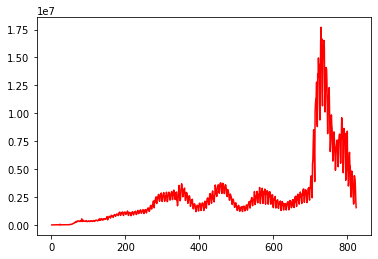

In [6]:
#ploting indicators
plt.plot(obs, new_cases, 'r', label = 'NewCases')

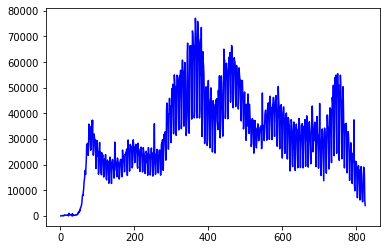

In [7]:
#ploting indicators
plt.plot(obs, new_deaths, 'b', label = 'NewDeaths')

In [8]:
# Preperation of time series datasets
scaler = MinMaxScaler(feature_range=(0, 1))
new_cases = scaler.fit_transform(new_cases)
new_deaths = scaler.fit_transform(new_deaths)

In [9]:
# TRAIN-TEST split
train_NC = int(len(new_cases) * 0.75)
test_NC = len(new_cases) - train_NC
train_NC, test_NC = new_cases[0:train_NC,:], new_cases[train_NC:len(new_cases),:]
train_ND = int(len(new_deaths) * 0.75)
test_ND = len(new_deaths) - train_ND
train_ND, test_ND = new_deaths[0:train_ND,:], new_deaths[train_ND:len(new_deaths),:]


In [10]:
# Function to create time series data
def new_dataset(df_new, step_size):
	data_X, data_Y = [], []
	for i in range(len(df_new)-step_size-1):
		a = df_new[i:(i+step_size), 0]
		data_X.append(a)
		data_Y.append(df_new[i + step_size, 0])
	return np.array(data_X), np.array(data_Y)

In [11]:
#Time Series Datasets
trainX, trainY = new_dataset(train_NC, 1)
testX, testY = new_dataset(test_NC, 1)
trainX1, trainY1 = new_dataset(train_ND, 1)
testX1, testY1 = new_dataset(test_ND, 1)

In [12]:
#Reshaping Data
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX1 = np.reshape(trainX1, (trainX1.shape[0], 1, trainX1.shape[1]))
testX1 = np.reshape(testX1, (testX1.shape[0], 1, testX1.shape[1]))
step_size = 1

In [13]:
#
model = Sequential()
model.add(LSTM(32, input_shape=(1, step_size), return_sequences = True))
model.add(LSTM(16))
model.add(Dense(1))
model.add(Activation('linear'))

In [14]:
model.compile(loss='mean_squared_error', optimizer='RMSProp') # Try RMSProp, AdaDelta, SGD, adam, adagrad and compare!!!
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
616/616 - 4s - loss: 0.0016 - 4s/epoch - 7ms/step
Epoch 2/10
616/616 - 1s - loss: 2.7966e-04 - 1s/epoch - 2ms/step
Epoch 3/10
616/616 - 1s - loss: 2.7761e-04 - 1s/epoch - 2ms/step
Epoch 4/10
616/616 - 1s - loss: 2.7171e-04 - 1s/epoch - 2ms/step
Epoch 5/10
616/616 - 1s - loss: 2.6957e-04 - 1s/epoch - 2ms/step
Epoch 6/10
616/616 - 1s - loss: 2.7347e-04 - 1s/epoch - 2ms/step
Epoch 7/10
616/616 - 2s - loss: 2.7293e-04 - 2s/epoch - 2ms/step
Epoch 8/10
616/616 - 1s - loss: 2.6203e-04 - 1s/epoch - 2ms/step
Epoch 9/10
616/616 - 1s - loss: 2.5111e-04 - 1s/epoch - 2ms/step
Epoch 10/10
616/616 - 1s - loss: 2.6006e-04 - 1s/epoch - 2ms/step


In [15]:
model.compile(loss='mean_squared_error', optimizer='RMSProp') 
model.fit(trainX1, trainY1, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
616/616 - 4s - loss: 0.0079 - 4s/epoch - 7ms/step
Epoch 2/10
616/616 - 1s - loss: 0.0080 - 1s/epoch - 2ms/step
Epoch 3/10
616/616 - 1s - loss: 0.0080 - 1s/epoch - 2ms/step
Epoch 4/10
616/616 - 1s - loss: 0.0081 - 1s/epoch - 2ms/step
Epoch 5/10
616/616 - 1s - loss: 0.0079 - 1s/epoch - 2ms/step
Epoch 6/10
616/616 - 1s - loss: 0.0081 - 1s/epoch - 2ms/step
Epoch 7/10
616/616 - 1s - loss: 0.0077 - 1s/epoch - 2ms/step
Epoch 8/10
616/616 - 1s - loss: 0.0080 - 1s/epoch - 2ms/step
Epoch 9/10
616/616 - 1s - loss: 0.0080 - 1s/epoch - 2ms/step
Epoch 10/10
616/616 - 1s - loss: 0.0077 - 1s/epoch - 2ms/step


In [16]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict1 = model.predict(trainX1)
testPredict1 = model.predict(testX1)

In [17]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
trainPredict1 = scaler.inverse_transform(trainPredict1)
trainY1 = scaler.inverse_transform([trainY1])
testPredict1 = scaler.inverse_transform(testPredict1)
testY1 = scaler.inverse_transform([testY1])

In [18]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train RMSE: %.2f' % (trainScore))
trainScore1 = math.sqrt(mean_squared_error(trainY1[0], trainPredict1[:,0]))
print('Train1 RMSE: %.2f' % (trainScore1))

Train RMSE: 1889.27
Train1 RMSE: 6672.79


In [19]:
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test RMSE: %.2f' % (testScore))
testScore1 = math.sqrt(mean_squared_error(testY1[0], testPredict1[:,0]))
print('Test1 RMSE: %.2f' % (testScore1))

Test RMSE: 5912.68
Test1 RMSE: 7604.50


In [20]:
trainPredictPlot = np.empty_like(new_cases)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[step_size:len(trainPredict)+step_size, :] = trainPredict
trainPredictPlot1 = np.empty_like(new_deaths)
trainPredictPlot1[:, :] = np.nan
trainPredictPlot1[step_size:len(trainPredict1)+step_size, :] = trainPredict1

In [21]:
testPredictPlot = np.empty_like(new_cases)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(step_size*2)+1:len(new_cases)-1, :] = testPredict
testPredictPlot1 = np.empty_like(new_deaths)
testPredictPlot1[:, :] = np.nan
testPredictPlot1[len(trainPredict1)+(step_size*2)+1:len(new_deaths)-1, :] = testPredict1

In [22]:
new_cases = scaler.inverse_transform(new_cases)
new_deaths = scaler.inverse_transform(new_deaths)

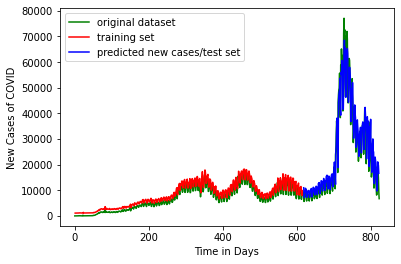

In [23]:
plt.plot(new_cases, 'g', label = 'original dataset')
plt.plot(trainPredictPlot, 'r', label = 'training set')
plt.plot(testPredictPlot, 'b', label = 'predicted new cases/test set')
plt.legend(loc = 'upper left')
plt.xlabel('Time in Days')
plt.ylabel('New Cases of COVID')
plt.show()

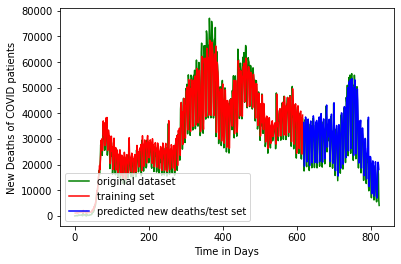

In [24]:
plt.plot(new_deaths, 'g', label = 'original dataset')
plt.plot(trainPredictPlot1, 'r', label = 'training set')
plt.plot(testPredictPlot1, 'b', label = 'predicted new deaths/test set')
plt.legend(loc = 'lower left')
plt.xlabel('Time in Days')
plt.ylabel('New Deaths of COVID patients')
plt.show()

In [25]:
data_class.dropna(how='any', inplace=True)
data_class = data_class.reset_index(drop=True)
data_class

,new_cases,new_deaths
0,6.0,1.0
1,2.0,0.0
2,32.0,0.0
3,6.0,1.0
4,11.0,0.0
...,...,...
156297,39.0,2.0
156298,47.0,1.0
156299,105.0,1.0
156300,36.0,0.0


0.0032166377558171533
[0.96592847]


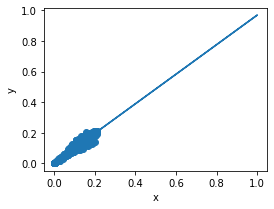

In [67]:
trainX2, trainY2 = new_dataset(train_NC, 1)
testX2, testY2 = new_dataset(test_NC, 1)
lm=LinearRegression()
lm.fit(trainX2, trainY2)
print(lm.intercept_)
print(lm.coef_)

testY2= lm.predict(testX2)
plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(trainX2, trainY2)
ax.plot(testX2, testY2)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('auto')


plt.show()

In [27]:
X = data.iloc[:, [0, 1, 2]].values
y = data.iloc[:, -1].values
h=0.2
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.20, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train1)
X_test = sc.transform(X_test1)
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train1, y_train1)

KNeighborsClassifier()

In [28]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

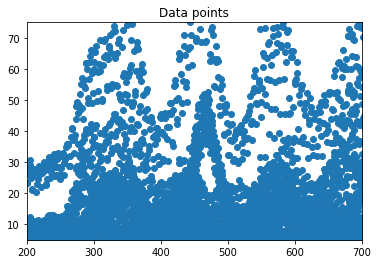

In [91]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1]/10000)
plt.xlim(200, 700)
plt.ylim(5, 75)
plt.title("Data points")
plt.show()

In [68]:
y_score = classifier.predict_proba(X_test)[:, 1]
fig = px.scatter(
    X_test, x=0, y=1,
    color=y_score, color_continuous_scale='RdBu',
    symbol=y_test1, symbol_map={'0': 'square-dot', '1': 'circle-dot'},
    labels={'symbol': 'label', 'color': 'score of <br>first class'},log_y=True
)
fig.update_traces(marker_size=12, marker_line_width=1.5)
fig.update_layout(legend_orientation='h')
fig.show()